#### Contents

##### 01 Import libraries and data
##### 02 Wrangle data
##### 03 Run gradient descent: 2000, Basel
##### 04 Run Gradient Descent: 1982, Valentia
##### 05 Run Gradient Descent: 1961, Madrid

#### 01 Import libraries and data

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [2]:
#Create path
path = r'/Users/Owner/Documents/CareerFoundry/Machine Learning Specialization/Data Sets'

In [3]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path,'temperature_scaled.csv'))
climate

DATE  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0      19600101           0.660514          -0.02793        0.826097   
1      19600102           0.244897          -0.02793        0.735760   
2      19600103           1.076130          -0.02793        1.277781   
3      19600104          -1.001953          -0.02793        1.458455   
4      19600105           0.244897          -0.02793        1.729466   
...         ...                ...               ...             ...   
22945  20221027          -1.833187          -0.02793        0.284075   
22946  20221028           0.244897          -0.02793        0.103401   
22947  20221029          -0.586336          -0.02793        0.013064   
22948  20221030          -0.170720          -0.02793        0.374412   
22949  20221031          -0.170720          -0.02793        0.735760   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           -0.001949               -1.101066            -0.265148   
1           -0.001949               -1.058108             1.658760   
2           -0.001949               -1.251420             0.155707   
3           -0.001949               -0.821838            -0.445514   
4           -0.001949               -0.746661            -0.164944   
...               ...                     ...                  ...   
22945        1.037367               -0.005632            -0.004619   
22946        0.976231               -0.005632            -0.004619   
22947        0.716402               -0.005632            -0.004619   
22948        0.487141               -0.005632            -0.004619   
22949        0.196744               -0.005632            -0.004619   

       BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  ...  \
0             -0.179228       -0.902918        -0.528623  ...   
1             -0.179228       -0.810126        -0.582946  ...   
2             -0.179228       -1.065304        -0.257010  ...   
3             -0.179228       -0.114186        -0.555784  ...   
4             -0.179228        0.187388        -1.003946  ...   
...                 ...             ...              ...  ...   
22945         -0.179228        0.720943         0.747959  ...   
22946         -0.179228        0.187388         0.856604  ...   
22947         -0.179228        0.349774         0.856604  ...   
22948         -0.179228        0.280180         0.680055  ...   
22949         -0.179228       -0.322968         0.422023  ...   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                 -0.443701           0.761754          -1.299744   
1                  0.783085           1.183580          -1.262455   
2                  0.783085           1.183580          -0.432779   
3                  0.783085           0.480538           0.387574   
4                 -1.670486          -0.363113           1.729970   
...                     ...                ...                ...   
22945             -0.443701          -0.081896          -0.003958   
22946             -0.443701          -0.081896          -0.003958   
22947             -0.443701          -0.081896          -0.003958   
22948             -0.443701          -0.081896          -0.003958   
22949             -0.443701          -0.081896          -0.003958   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_snow_depth  \
0                      -0.806427               -0.088407            -0.024706   
1                      -1.042055                0.503361            -0.024706   
2                      -1.136306               -0.396127            -0.024706   
3                      -1.183432                0.669056            -0.024706   
4                      -0.794645               -0.490810            -0.024706   
...                          ...                     ...                  ...   
22945                  -0.005290               -0.005560            -0.024706   
22946                  -0.005290               

#### 02 Wrangle data

In [4]:
#Reduce to just the mean temperatures
#YEAR already absent from scaled data
df = climate[['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [5]:
df

BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
0            -0.528623           -1.016876           -1.099163   
1            -0.582946           -1.107669           -1.110927   
2            -0.257010           -1.084971           -1.063873   
3            -0.555784           -1.209812           -1.146217   
4            -1.003946           -1.209812           -1.087400   
...                ...                 ...                 ...   
22945         0.747959            0.628750           -0.005167   
22946         0.856604            0.367720           -0.005167   
22947         0.856604            0.083991           -0.005167   
22948         0.680055            0.265577           -0.005167   
22949         0.422023            0.197483           -0.005167   

       DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
0             -0.114356             -0.105836         -0.927601   
1             -0.367511             -0.370915         -0.825294   
2             -0.509912             -0.532908         -0.940389   
3             -0.525734             -0.577088         -1.042696   
4             -0.320045             -0.444548         -0.978754   
...                 ...                   ...               ...   
22945          0.898267              1.042841          0.440753   
22946          0.945734              1.278467          0.466330   
22947          0.914089              1.101748          0.786039   
22948          0.692578              0.880848          0.376811   
22949          0.439422              0.659949          0.159409   

       HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
0               -0.106469         -0.182904            -1.370824   
1               -0.892676         -0.212437            -1.043881   
2               -0.490837         -0.389635            -0.741156   
3               -0.316124         -0.493001            -0.910682   
4               -0.403481         -0.552067            -0.862246   
...                   ...               ...                  ...   
22945            0.906865         -0.005705             0.481853   
22946            0.802037         -0.005705             0.263891   
22947            0.924336         -0.005705             0.300218   
22948            0.697210         -0.005705             0.397090   
22949            0.435140         -0.005705             0.348654   

       MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
0                 -0.097084         -0.988280           -0.265742   
1                 -0.232112         -0.691740           -0.353714   
2                 -0.487164         -0.853490           -0.403983   
3                 -0.472161         -0.624345           -0.642763   
4                 -0.307127         -0.381721           -0.906678   
...                     ...               ...                 ...   
22945              1.268193          0.683127            0.664244   
22946              1.313202          0.561815            0.890456   
22947              1.208181          0.548336            1.053832   
22948              0.923123          0.103526            0.689378   
22949              0.773092         -0.112140            0.488300   

       OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
0           -0.186575       -1.280450            -0.124331   
1           -0.368598       -0.539569            -0.650834   
2           -0.550620       -0.876333            -0.650834   
3           -0.417137       -0.775304            -0.943336   
4           -0.332193       -0.926848            -0.621584   
...               ...             ...                  ...   
22945        0.395898       -0.000746             0.826301   
22946        0.541516       -0.000746             1.074927   
22947        0.395898       -0.000746             1.221178   
22948       -0.065226       -0.000746             1.235803   
22949        0.335224       -0.000746             0.987177   

       STOCKHOLM_t

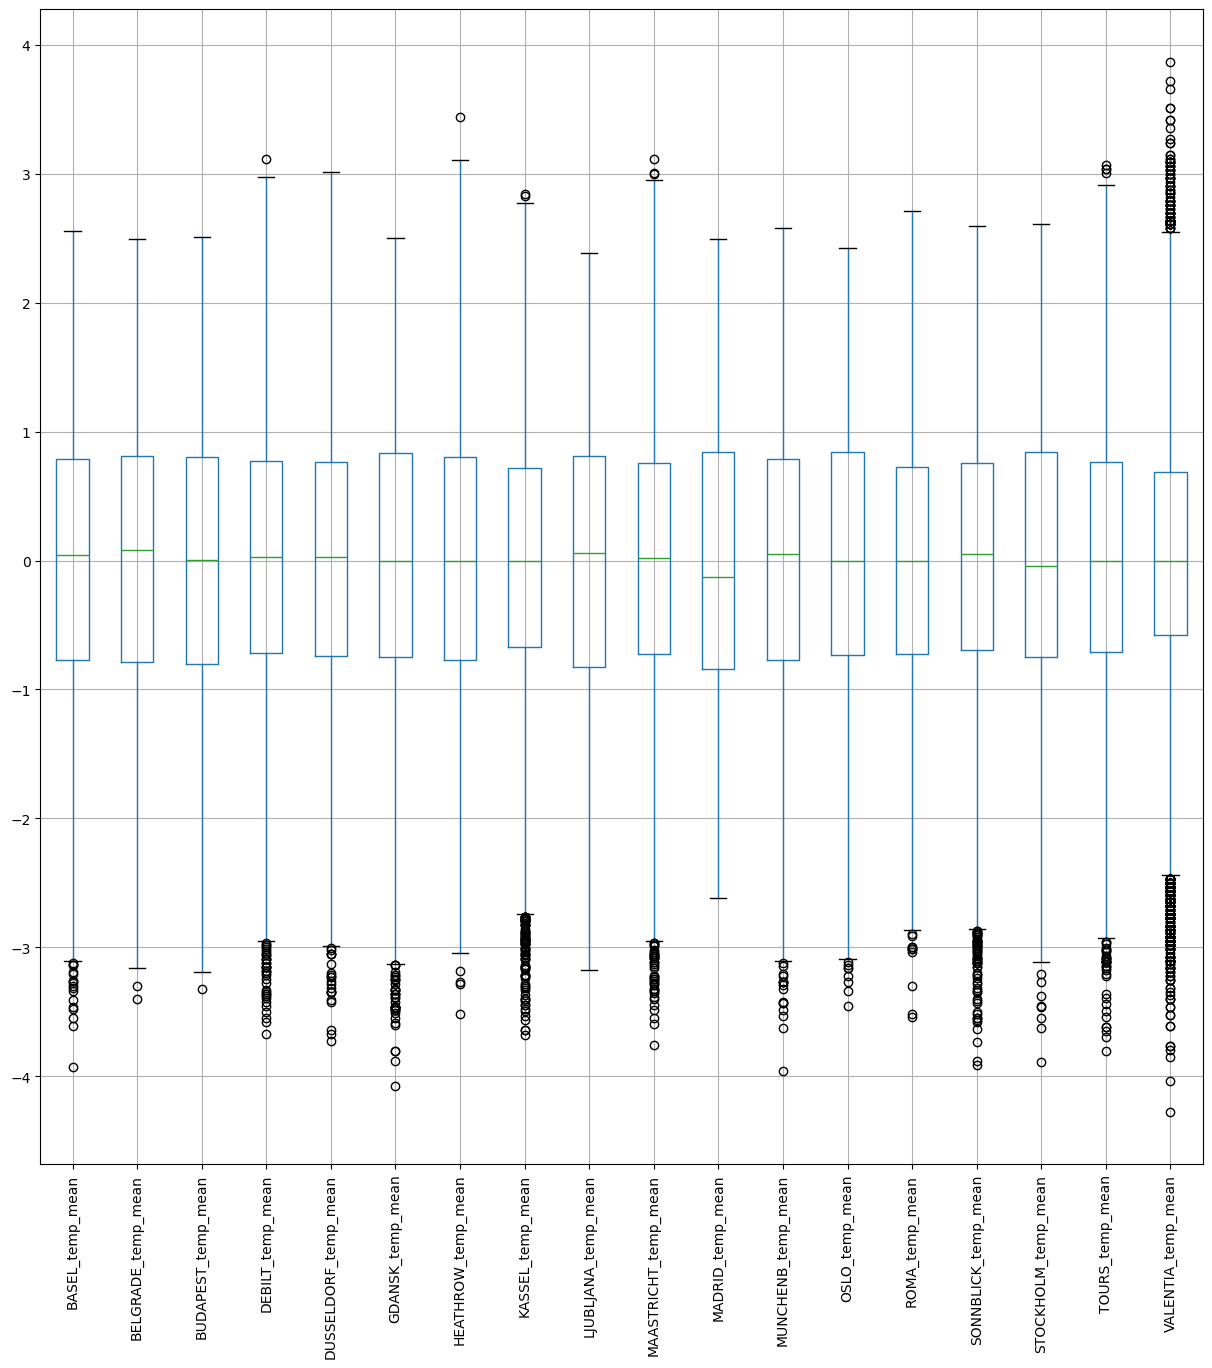

In [6]:
#Look at a whisker plot of the data to see variations in temperatures
df.boxplot(figsize=(15,15))
plt.xticks(rotation=90)
plt.show()

In [7]:
df = climate[['DATE', 'BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

#### 03 Run gradient descent: 2000, Basel

In [8]:
#Reduce your dataset to a single year
dfyear = df[df['DATE'].astype(str).str.contains('2000')] #<-----INSERT YEAR HERE
dfyear

DATE  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
14610  20000101        -1.017527           -1.720523           -1.957892   
14611  20000102        -0.922462           -1.572984           -1.804967   
14612  20000103        -1.112591           -1.550286           -1.475592   
14613  20000104        -0.881720           -1.584333           -1.499119   
14614  20000105        -0.596526           -1.527588           -1.357958   
...         ...              ...                 ...                 ...   
14971  20001227        -0.705172           -0.040850           -0.863895   
14972  20001228        -1.058269           -0.108944           -0.652154   
14973  20001229        -1.261978           -0.596958           -0.840368   
14974  20001230        -1.275559           -0.948781           -1.087400   
14975  20001231        -1.329882           -1.209812           -1.228561   

       DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
14610         -0.620667             -0.959981         -1.119426   
14611         -0.430800             -0.621268         -1.068273   
14612         -0.256756             -0.444548         -0.620680   
14613         -0.573200             -0.429822         -0.556739   
14614         -0.889645             -0.812714         -0.786929   
...                 ...                   ...               ...   
14971         -1.744046             -1.372326         -1.247310   
14972         -1.506712             -1.416506         -1.119426   
14973         -1.490890             -1.534319         -1.170580   
14974         -1.316845             -1.387053         -1.413558   
14975         -1.601646             -1.401779         -0.902024   

       HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
14610           -0.735435         -0.832631            -1.879402   
14611           -0.578193         -1.009829            -1.407151   
14612           -0.316124         -0.832631            -1.334497   
14613           -0.735435         -0.640666            -1.734094   
14614           -0.840262         -1.009829            -1.661440   
...                   ...               ...                  ...   
14971           -1.574056         -1.142728            -0.523194   
14972           -2.010837         -1.201794            -0.523194   
14973           -2.342792         -1.570958            -0.934900   
14974           -2.150608         -1.319926            -1.104426   
14975           -1.469228         -1.467592            -1.358715   

       MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
14610             -0.682203         -1.284820           -0.919246   
14611             -0.592185         -1.338737           -0.894111   
14612             -0.502167         -1.540923           -1.183161   
14613             -0.427152         -1.433090           -0.655331   
14614             -0.742216         -1.931817           -0.466820   
...                     ...               ...                 ...   
14971             -1.537377         -1.096113           -1.032352   
14972             -1.402350         -1.284820           -0.931813   
14973             -1.492368         -0.853490           -1.220863   
14974             -1.432356         -1.069155           -1.183161   
14975             -1.342338         -1.365695           -1.472210   

       OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
14610       -1.387925       -0.000746            -1.484464   
14611       -0.878261       -1.886626            -1.265088   
14612       -0.635564       -1.953979            -0.606959   
14613       -0.526351       -1.583538            -0.080455   
14614       -0.866127       -1.751920            -0.372957   
...               ...             ...                  ...   
14971       -1.169498       -0.388025            -0.767835   
14972       -1.205902       -0.691113            -0.782460   
14973       -1.302981       -0.825818            -0.797085   
14974       -1.667027      

In [9]:
dfyear.describe()

DATE  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
count  3.660000e+02       366.000000          366.000000          366.000000   
mean   2.000067e+07         0.189334            0.174319            0.111792   
std    3.457653e+02         0.876730            1.017296            0.989119   
min    2.000010e+07        -2.334850           -2.560360           -2.157869   
25%    2.000040e+07        -0.484486           -0.596958           -0.681562   
50%    2.000070e+07         0.191152            0.299625            0.235983   
75%    2.000098e+07         0.910926            0.912479            0.888852   
max    2.000123e+07         1.997379            2.285726            2.088719   

       DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
count        366.000000            366.000000        366.000000   
mean           0.138324              0.107620          0.143232   
std            0.862365              0.861824          0.810899   
min           -2.028846             -1.961391         -2.359897   
25%           -0.541556             -0.558680         -0.467220   
50%            0.122978              0.107700          0.236139   
75%            0.819156              0.744627          0.821207   
max            2.512135              2.633317          1.809107   

       HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
count          366.000000        366.000000           366.000000   
mean             0.065189          0.139297             0.176845   
std              0.900700          0.938943             0.951569   
min             -2.342792         -2.309284            -2.254781   
25%             -0.630607         -0.552067            -0.532276   
50%              0.033301          0.134577             0.294164   
75%              0.815141          0.920895             0.917777   
max              2.479279          2.401239             1.959152   

       MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
count            366.000000        366.000000          366.000000   
mean               0.146490          0.010056            0.198358   
std                0.868501          0.961111            0.907923   
min               -2.032478         -1.931817           -2.666111   
25%               -0.502167         -0.745657           -0.476246   
50%                0.135463         -0.139098            0.224385   
75%                0.829354          0.871834            0.925017   
max                2.513446          1.950161            2.235165   

       OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
count      366.000000      366.000000           366.000000   
mean         0.165535        0.102767             0.111589   
std          0.806532        1.072996             0.939300   
min         -2.395118       -2.307581            -2.698347   
25%         -0.429272       -0.842657            -0.541146   
50%          0.256347        0.108702             0.197422   
75%          0.817584        1.009546             0.822644   
max          1.633653        2.373441             1.981683   

       STOCKHOLM_temp_mean  TOURS_temp_mean  VALENTIA_temp_mean  
count           366.000000       366.000000          366.000000  
mean              0.143601         0.105552            0.010196  
std               0.814405         0.880330            1.118192  
min              -2.170075        -2.139837           -2.801209  
25%              -0.537249        -0.539698           -0.848468  
50%               0.243397        -0.006319           -0.067372  
75%               0.815664         0.868267            0.954062  
max               1.786029         2.284075            2.636423

In [10]:
#Drop the DATE data as those numbers are not scaled with the rest.
notempyear = dfyear.drop(['DATE'], axis=1)

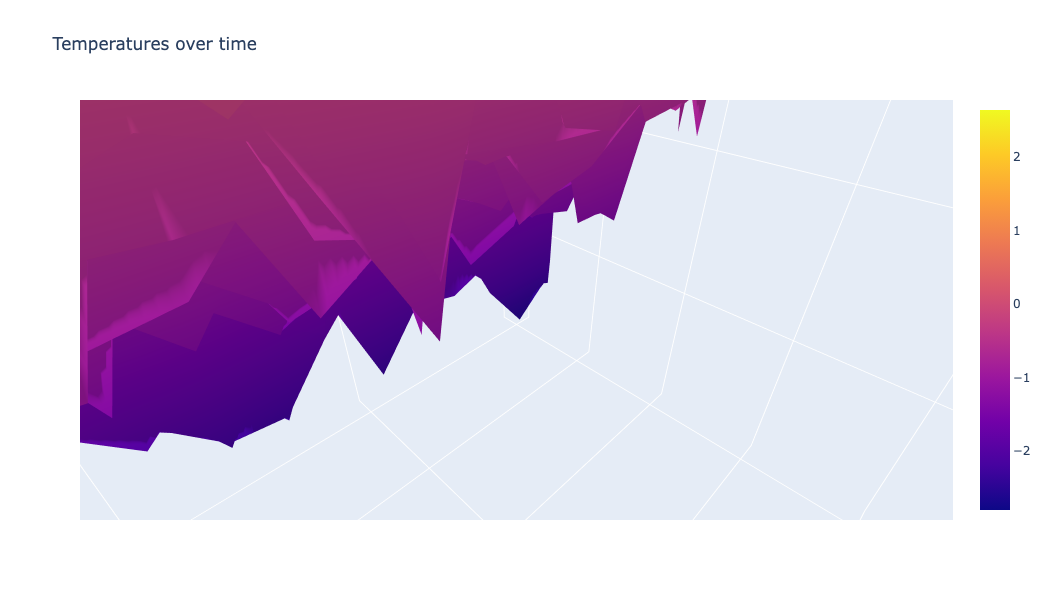

In [92]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [12]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [13]:
n_rows = dfyear.shape[0]
n_rows

366

In [14]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['BASEL_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

In [15]:
X.shape, y.shape

((366, 2), (366, 1))

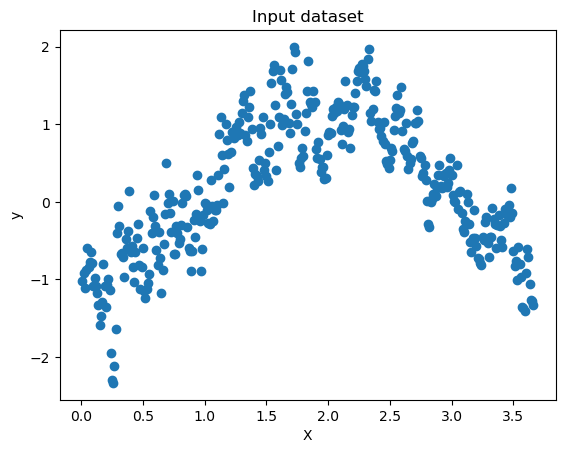

In [16]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['BASEL_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [17]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['BASEL_temp_mean'].min()

-2.334850163

In [18]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['BASEL_temp_mean'].max()

1.9973788678636883

In [19]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [20]:
compute_cost(X,y)

array([0.40120165])

In [21]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [78]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.01 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 179 ms, sys: 7.68 ms, total: 187 ms
Wall time: 2.53 s


In [80]:
theta

array([[ 0.39789619],
       [-0.04425164]])

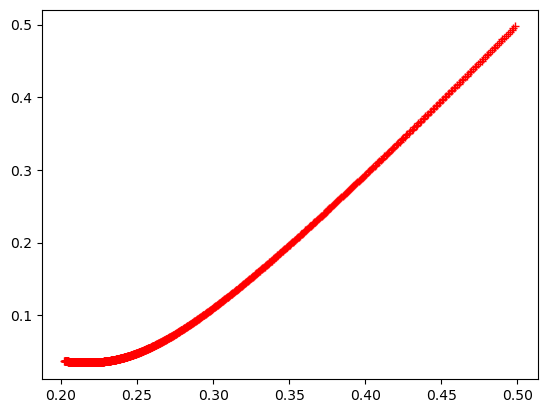

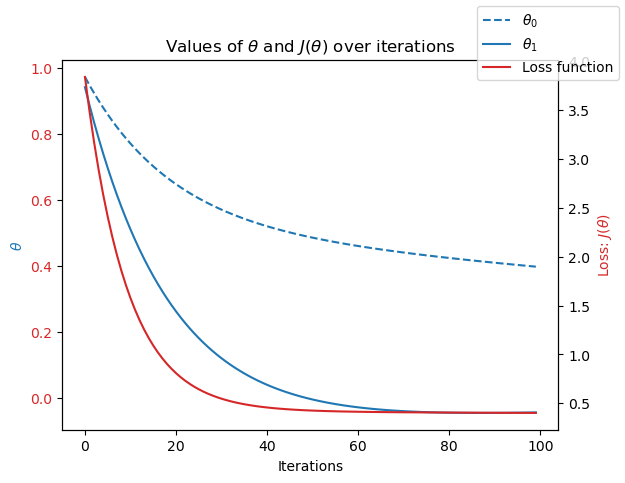

In [82]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [86]:
%%time
# theta range
theta0_vals = np.linspace(-3,3,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-3,3,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 6.17 s, sys: 242 ms, total: 6.41 s
Wall time: 21.6 s


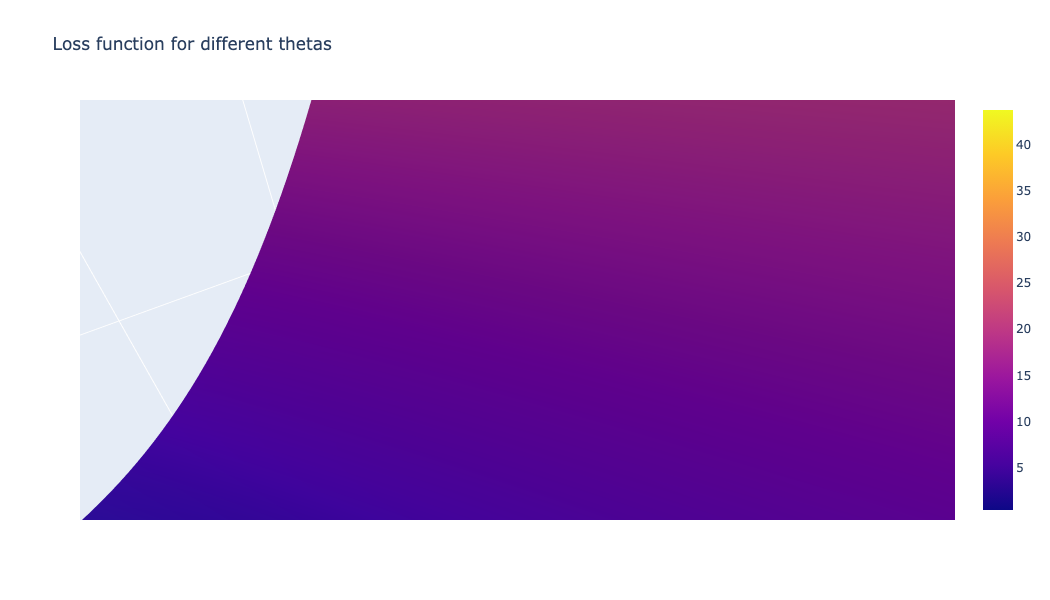

In [88]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

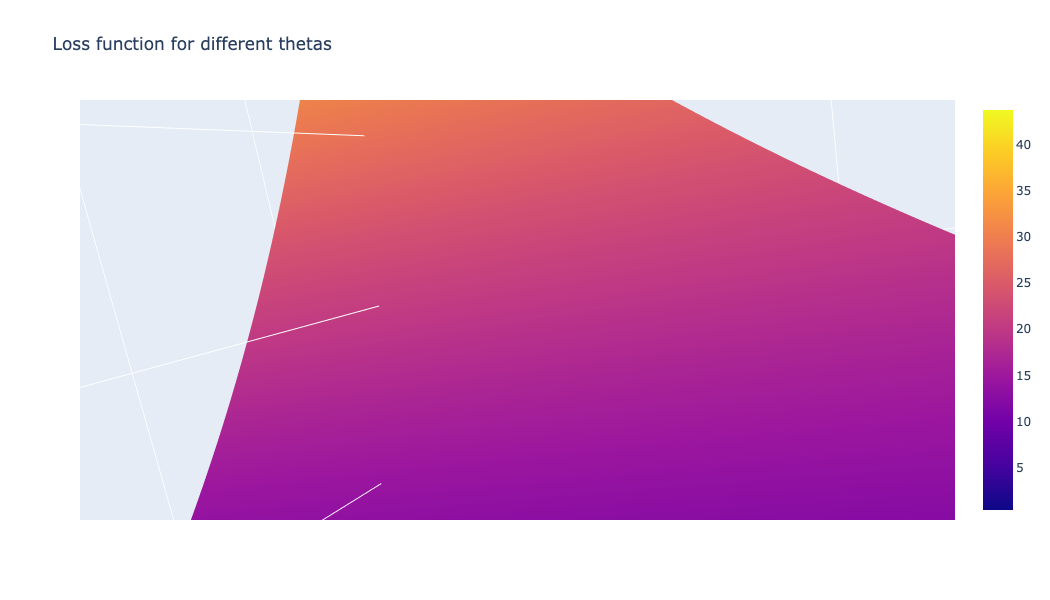

In [90]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

#### 04 Run Gradient Descent: 1982, Valentia

In [127]:
#Reduce your dataset to a single year
dfyear = df[df['DATE'].astype(str).str.contains('1982')] #<-----INSERT YEAR HERE
dfyear

DATE  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
8036  19820101        -0.705172            0.197483           -0.946239   
8037  19820102        -0.718752           -0.744497           -0.758024   
8038  19820103        -0.637268           -0.801242           -0.887422   
8039  19820104        -0.216268           -0.562910           -1.087400   
8040  19820105        -0.066881           -0.551561           -0.452176   
...        ...              ...                 ...                 ...   
8396  19821227        -0.678010           -1.243859           -0.958002   
8397  19821228        -0.691591           -1.141717           -0.722734   
8398  19821229        -1.126172           -1.209812           -1.005056   
8399  19821230        -1.642237           -1.516239           -1.287378   
8400  19821231        -1.587914           -1.572984           -1.393248   

      DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
8036         -0.747245             -0.547635         -0.799717   
8037         -0.589023             -0.621268         -0.812506   
8038         -0.051067             -0.061656         -0.927601   
8039         -0.114356             -0.105836         -0.569527   
8040         -0.320045             -0.267829         -1.170580   
...                ...                   ...               ...   
8396         -0.320045             -0.415095         -0.531162   
8397         -0.731423             -0.783261         -0.697411   
8398         -1.301023             -1.431233         -0.671834   
8399         -1.221912             -1.195607         -0.812506   
8400         -1.585823             -1.431233         -0.940389   

      HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
8036           -0.980032         -0.699732            -0.741156   
8037           -0.613136         -0.758798            -1.092317   
8038           -0.351067         -0.256736            -1.395042   
8039           -0.088998         -0.153371            -0.692720   
8040           -0.281182         -0.197670            -0.704829   
...                  ...               ...                  ...   
8396           -0.490837         -0.522534            -1.455587   
8397           -1.259573         -0.980296            -1.261843   
8398           -1.224630         -0.935997            -1.019663   
8399           -0.910147         -1.113195            -1.395042   
8400           -1.014975         -1.452825            -1.637222   

      MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
8036             -0.472161         -1.069155           -0.806139   
8037             -0.547176         -1.217425           -0.881544   
8038             -0.007066         -1.001760           -0.579927   
8039             -0.022069         -0.866969           -0.202905   
8040             -0.127091         -0.813052           -0.190338   
...                    ...               ...                 ...   
8396             -0.352136         -1.001760           -0.579927   
8397             -0.832234         -1.015239           -0.818707   
8398             -1.237316         -1.230904           -1.145458   
8399             -1.327334         -1.352216           -1.497345   
8400             -1.627395         -1.433090           -1.610451   

      OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
8036       -1.363655       -0.539569            -0.475333   
8037       -1.897589       -1.145744            -0.987211   
8038       -2.128151       -1.314127            -0.446083   
8039       -2.759164       -1.398318             0.007295   
8040       -2.795568       -1.145744            -0.533833   
...              ...             ...                  ...   
8396       -1.048149       -1.448832            -0.840960   
8397       -1.108824       -1.533023            -1.104212   
8398       -1.193768       -1.364641            -1.952467   
8399       -1.133093       -2.004493            -1.923217   
8400       -1.108824   

In [129]:
dfyear.describe()

DATE  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
count  3.650000e+02       365.000000          365.000000          365.000000   
mean   1.982067e+07        -0.007312           -0.061620           -0.014739   
std    3.454755e+02         0.956373            0.993266            1.043766   
min    1.982010e+07        -2.199044           -2.174489           -2.546062   
25%    1.982040e+07        -0.759494           -0.892036           -0.781551   
50%    1.982070e+07        -0.094042            0.015896           -0.052220   
75%    1.982100e+07         0.829443            0.833035            0.971196   
max    1.982123e+07         1.861572            1.865807            1.782871   

       DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
count        365.000000            365.000000        365.000000   
mean           0.008971              0.049621         -0.024673   
std            1.059462              1.042947          0.985167   
min           -3.025646             -3.257335         -2.359897   
25%           -0.778890             -0.694901         -0.786929   
50%            0.028044              0.041430         -0.057993   
75%            0.866623              0.880848          0.811615   
max            2.338090              2.368238          1.975355   

       HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
count          365.000000        365.000000           365.000000   
mean            -0.036775          0.042964            -0.037109   
std              1.007772          1.171058             1.009244   
min             -2.692217         -3.402007            -2.182127   
25%             -0.805320         -0.876931            -0.874355   
50%             -0.071526          0.053361            -0.014616   
75%              0.784566          0.998419             0.845123   
max              2.094911          2.342173             1.716972   

       MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
count            365.000000        365.000000          365.000000   
mean               0.014555         -0.020593           -0.085116   
std                1.011364          0.914405            1.025950   
min               -3.022679         -1.608319           -3.219075   
25%               -0.727212         -0.826531           -0.831274   
50%               -0.007066         -0.179535           -0.127501   
75%                0.818102          0.844876            0.802485   
max                2.168376          2.031036            1.807875   

       OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
count      365.000000      365.000000           365.000000   
mean        -0.044547        0.028179             0.022802   
std          1.042873        1.147688             0.993019   
min         -3.268827       -2.156037            -2.493596   
25%         -0.720508       -0.994201            -0.753210   
50%         -0.040957       -0.135452            -0.021955   
75%          0.784213        1.127414             0.928676   
max          2.301070        2.322927             1.967058   

       STOCKHOLM_temp_mean  TOURS_temp_mean  VALENTIA_temp_mean  
count           365.000000       365.000000          365.000000  
mean             -0.033738         0.066919            0.035512  
std               1.025629         0.922261            1.113487  
min              -2.792104        -2.139837           -2.951420  
25%              -0.751849        -0.633824           -0.848468  
50%              -0.042736        -0.069069            0.022755  
75%               0.728580         0.903564            0.984104  
max               2.320974         2.033073            2.696507

In [131]:
#Drop the DATE data as those numbers are not scaled with the rest.
notempyear = dfyear.drop(['DATE'], axis=1)

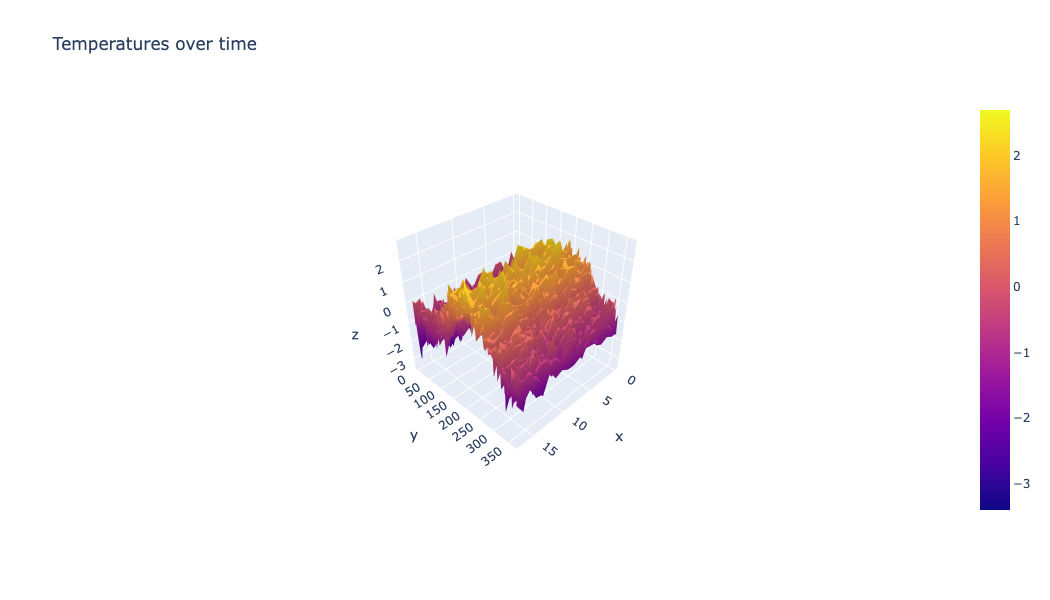

In [133]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [135]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [137]:
n_rows = dfyear.shape[0]
n_rows

365

In [139]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['VALENTIA_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

In [141]:
X.shape, y.shape

((365, 2), (365, 1))

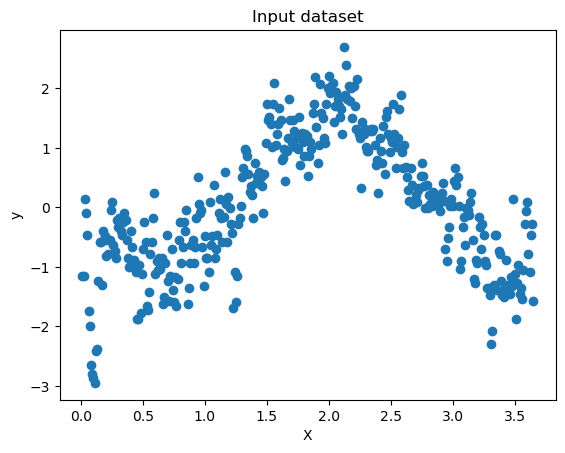

In [169]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['VALENTIA_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [145]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['VALENTIA_temp_mean'].min()

-2.951419506

In [147]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['VALENTIA_temp_mean'].max()

2.696507483470759

In [149]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [151]:
compute_cost(X,y)

array([0.6188588])

In [153]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [211]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=80 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0.7],[0.7]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.008 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 113 ms, sys: 4.16 ms, total: 117 ms
Wall time: 182 ms


In [213]:
theta

array([[ 0.27955971],
       [-0.03059117]])

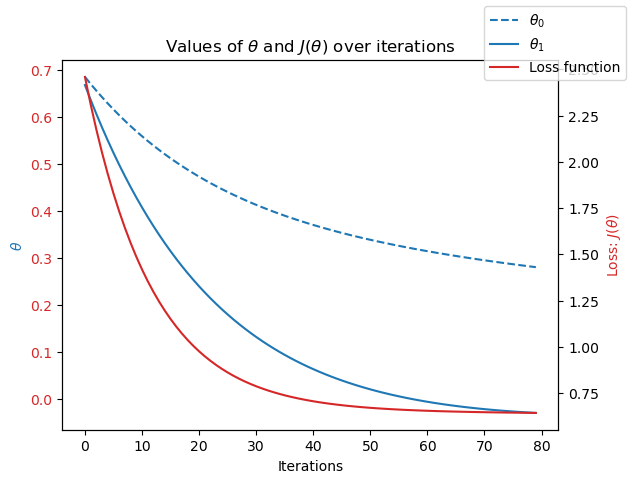

In [215]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [217]:
%%time
# theta range
theta0_vals = np.linspace(-2,2,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-2,2,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 2.87 s, sys: 27.9 ms, total: 2.89 s
Wall time: 3.74 s


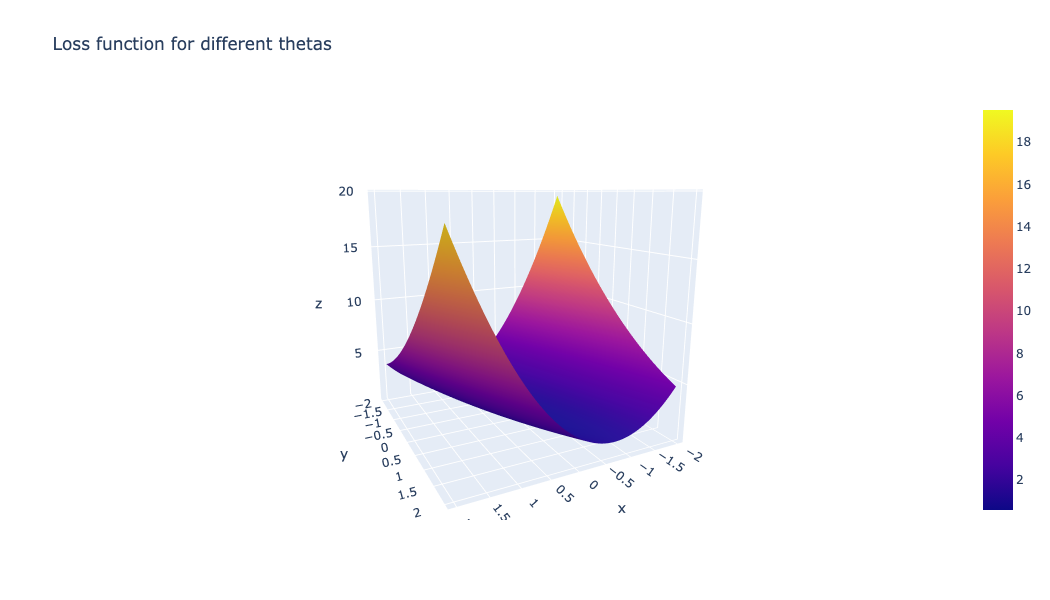

In [219]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

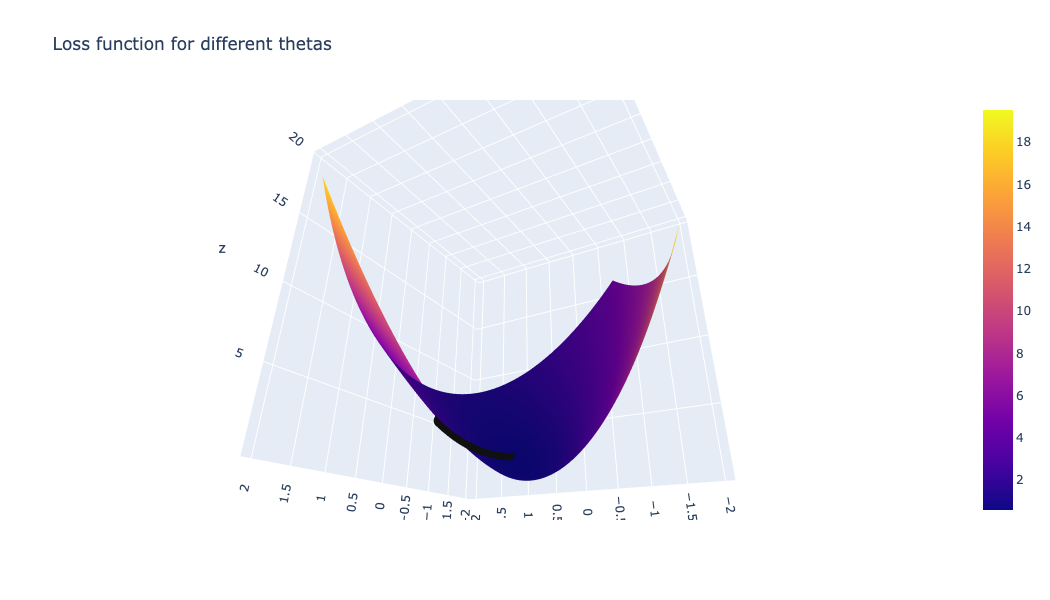

In [221]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [231]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=80 #<---start with the same iterations as above
theta_init=np.array([[0.06],[0.02]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= -0.008 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [233]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

#### 05 Run Gradient Descent: 1961, Madrid

In [243]:
#Reduce your dataset to a single year
dfyear = df[df['DATE'].astype(str).str.contains('1961')] #<-----INSERT YEAR HERE
dfyear

DATE  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
366  19610101        -1.261978           -1.119018           -1.146217   
367  19610102        -0.813817           -0.778544           -1.216797   
368  19610103        -0.745913           -0.290531           -0.922712   
369  19610104        -0.840978           -0.199738           -0.863895   
370  19610105        -1.180494           -0.585609           -0.663917   
..        ...              ...                 ...                 ...   
726  19611227        -1.927431           -1.187113           -1.993182   
727  19611228        -1.533592           -1.368700           -1.440302   
728  19611229        -1.424946           -1.448144           -1.240324   
729  19611230        -1.302720           -1.516239           -1.310904   
730  19611231        -0.528623           -0.653703           -1.310904   

     DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
366         -1.174445             -1.107247         -1.017119   
367         -0.889645             -0.901074         -0.978754   
368         -0.715601             -0.753808         -0.889236   
369         -0.984579             -0.974707         -0.684622   
370         -0.905467             -1.107247         -0.876447   
..                ...                   ...               ...   
726         -2.519335             -2.108658         -2.986526   
727         -2.503513             -1.769945         -2.666817   
728         -1.190268             -1.063067         -1.490288   
729         -0.557378             -0.518182         -1.042696   
730         -1.142801             -0.577088         -1.029908   

     HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
366           -1.294515         -1.083662            -1.310279   
367           -1.224630         -0.862164            -1.237625   
368           -1.608998         -0.758798            -1.068099   
369           -1.294515         -0.965530            -0.995445   
370           -1.504171         -0.906464            -1.128644   
..                  ...               ...                  ...   
726           -1.888539         -2.545549            -1.673549   
727           -2.342792         -1.940121            -1.455587   
728           -1.713826         -1.201794            -1.164971   
729           -1.119803         -0.935997            -0.777483   
730           -1.888539         -0.404402            -0.777483   

     MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
366             -1.087286         -1.163509           -1.208295   
367             -0.802228         -1.379174           -1.082622   
368             -0.697206         -1.015239           -0.956948   
369             -0.967261         -1.298299           -0.982083   
370             -1.042277         -1.365695           -1.057487   
..                    ...               ...                 ...   
726             -2.527578         -1.069155           -1.736125   
727             -1.882447         -1.082634           -1.648153   
728             -0.937255         -0.826531           -2.201118   
729             -0.262118         -0.732178           -1.962338   
730             -0.622191         -0.664782           -0.755870   

     OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  STOCKHOLM_temp_mean  \
366       -0.817587       -1.145744            -1.016461            -0.838933   
367       -0.805452       -0.657436            -1.031086            -0.789171   
368       -0.671969       -1.027877            -0.957961            -0.726968   
369       -0.708373       -1.078392            -1.060337            -0.664765   
370       -0.817587       -1.044715            -1.352838            -0.826492   
..              ...             ...                  ...                  ...   
726       -1.751971       -0.337510            -0.753210            -2.207397   
727       -0.866127       -0.185966            -0.694709            -1.510724   
728       -1

In [245]:
dfyear.describe()

DATE  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
count  3.650000e+02       365.000000          365.000000          365.000000   
mean   1.961067e+07         0.019142            0.008683            0.015911   
std    3.454755e+02         0.947265            0.948151            0.987079   
min    1.961010e+07        -2.728689           -2.526313           -2.346084   
25%    1.961040e+07        -0.678010           -0.755846           -0.793315   
50%    1.961070e+07         0.136829            0.129388            0.206575   
75%    1.961100e+07         0.734378            0.753591            0.806508   
max    1.961123e+07         1.929476            2.092790            2.029902   

       DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
count        365.000000            365.000000        365.000000   
mean          -0.026878             -0.002871          0.038568   
std            0.951551              0.922951          0.926514   
min           -2.867424             -2.447370         -3.088833   
25%           -0.668134             -0.650721         -0.684622   
50%            0.059689              0.056157          0.159409   
75%            0.708400              0.674675          0.773250   
max            2.401379              2.132612          1.885837   

       HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
count          365.000000        365.000000           365.000000   
mean            -0.038499          0.088841            -0.023540   
std              0.942468          1.013458             0.969821   
min             -2.342792         -2.767047            -2.545397   
25%             -0.717963         -0.581600            -0.765374   
50%             -0.001641          0.215793             0.167019   
75%              0.767095          0.835987             0.724033   
max              2.287095          2.283107             1.801735   

       MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
count            365.000000        365.000000          365.000000   
mean               0.009704          0.022836           -0.009368   
std                0.928760          0.940540            0.989509   
min               -2.737621         -1.931817           -3.319614   
25%               -0.622191         -0.664782           -0.642763   
50%                0.082952         -0.112140            0.111279   
75%                0.653068          0.993146            0.739648   
max                2.258394          1.734496            1.858144   

       OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
count      365.000000      365.000000           365.000000   
mean         0.012237        0.036667             0.012104   
std          0.977199        1.050807             0.914687   
min         -2.674220       -2.728536            -2.917724   
25%         -0.756913       -0.876333            -0.606959   
50%          0.226010       -0.017584             0.036546   
75%          0.832753        0.992708             0.606924   
max          1.633653        2.120868             1.937808   

       STOCKHOLM_temp_mean  TOURS_temp_mean  VALENTIA_temp_mean  
count           365.000000       365.000000          365.000000  
mean              0.030271        -0.182794            0.037406  
std               0.890500         0.758835            0.972378  
min              -2.282040        -2.469277           -3.612347  
25%              -0.652324        -0.618136           -0.578088  
50%               0.118992        -0.006319            0.052797  
75%               0.778342         0.087807            0.803851  
max               1.761148         2.127199            2.456170

In [249]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear = dfyear.drop(['DATE'], axis=1)

In [251]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [253]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [255]:
n_rows = dfyear.shape[0]
n_rows

365

In [257]:
X.shape, y.shape

((365, 2), (365, 1))

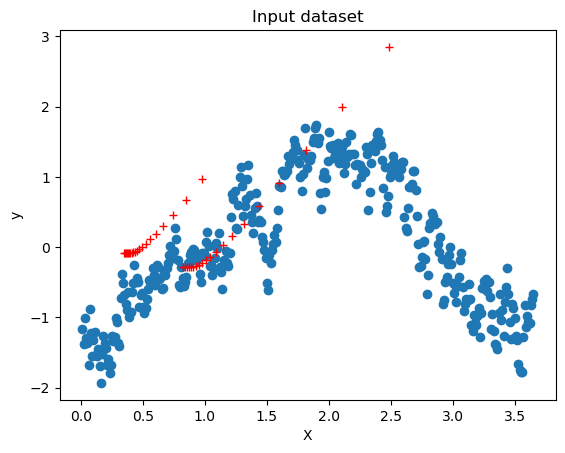

In [323]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['MADRID_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [261]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['MADRID_temp_mean'].min()

-1.931816708

In [263]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['MADRID_temp_mean'].max()

1.7344957527847114

In [265]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [267]:
compute_cost(X,y)

array([0.6188588])

In [269]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [303]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=20 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[3],[4]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.05 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 25.3 ms, sys: 2.88 ms, total: 28.1 ms
Wall time: 40.7 ms


In [305]:
theta

array([[ 0.82600561],
       [-0.28461   ]])

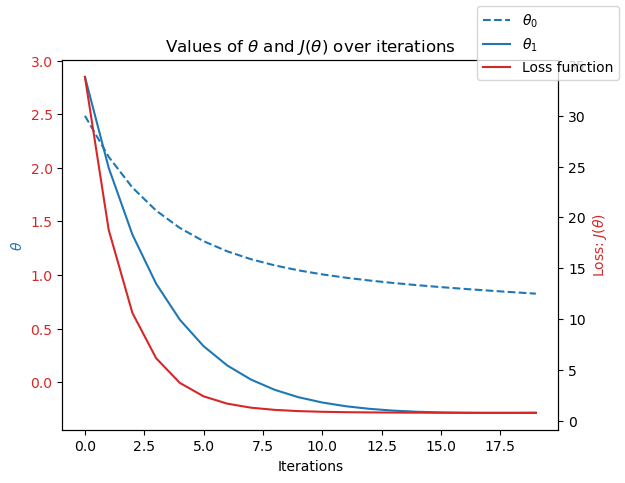

In [307]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [313]:
%%time
# theta range
theta0_vals = np.linspace(-15,15,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-15,15,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 3.81 s, sys: 74.8 ms, total: 3.89 s
Wall time: 6.68 s


In [315]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [317]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [319]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=20 #<---start with the same iterations as above
theta_init=np.array([[1.16],[1.36]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.05 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [321]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()